# Learning Machines

## Stats 141B

## Lecture 8

## Prof. Sharpnack

## Lecture slides at http://anson.ucdavis.edu/~jsharpna/141Blectures/

## Lecture repository at https://github.com/jsharpna/141Blectures/

### Linear model

$$\hat y_i = \beta_0 + \sum_{j=1}^p \beta_j x_{i,j}$$

### Inference in linear models

- statistically test for significance of effects
- requires normality assumptions, homoscedasticity, linear model is correct
- hard to obtain significance for individual effect under colinearity

### Prediction perspective

- think of OLS as a black-box model for predicting $Y | X$
- how do we evaluate performance of prediction?
- how do we choose between multiple OLS models?

### Linear Regression

- **Fit**: Compute $\hat \beta$ from OLS with training data $\{x_i,y_i\}_{i=1}^{n_0}$
- **Predict**: For a new predictor $x_{n+1}$ predict $$\hat y = \hat \beta_0 + \sum_{j=1}^p \hat \beta_j x_j$$
- **Loss**: Observe new response $y_{n+1}$ and see loss $$\ell(\hat y,y_{n+1}) = (\hat y - y_{n+1})^2$$

### Online learning

"you are a website that serves free content, and you want to get people to donate ... you want to strategically ask for these donations, so you monitor someone’s session all the while extracting possible predictor variables."  Will they donate?

- Player 2 (the user) shows the predictor variables (the session behavior of the user) to player 1;
- Player 1 (the website) then predicts the response variable (whether they donate or not), and then acts accordingly;
- Player 2 (the user) reveals the response variable;
- Player 1 then incurs some reward/loss;
- Repeat 1-4 for the next session.


### How do we move $\beta$ to reduce the loss?

$$\hat y_i = \beta_0 + \sum_{j=1}^p \beta_j x_{i,j} = \beta_0 + \beta^\top x_i$$

- **Loss**: $$\ell(\hat y_i,y) = \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i \right)^2$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sim_linmod(p = 2, sigma = .5):
    """Simulate and draw a single sample from a linear model"""
    beta = np.array([1,.5,2])
    x = np.random.normal(0,1,p)
    y = beta[0] + beta[1:] @ x + np.random.normal(0,sigma)
    plt.arrow(0,0,x[0],x[1],color='r',width=.05)
    plt.arrow(0,0,beta[1],beta[2],color='b',width=.05)
    plt.xlim([-2,2])
    plt.ylim([-3,3])
    plt.show()
    return "beta (blue): {}, x (red): {}, y: {}".format(beta,x,y)

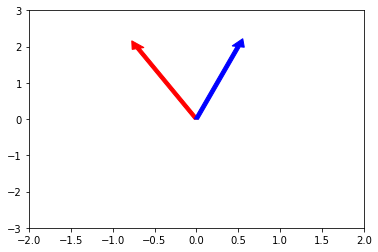

beta (blue): [1.  0.5 2. ], x (red): [-0.69601097  1.94807956], y: 4.059108053368506


In [26]:
print(sim_linmod())

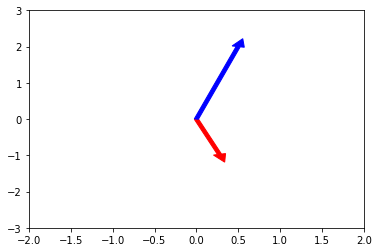

beta (blue): [1.  0.5 2. ], x (red): [ 0.27679599 -0.97205039], y: -0.6130490432151816


In [4]:
print(sim_linmod())

In [5]:
def sim_linfit(betahat,p = 2, sigma = .5):
    """Simulate and draw a single sample from a linear model with prediction"""
    beta = np.array([1,.5,2])
    x = np.random.normal(0,1,p)
    y = beta[0] + beta[1:] @ x + np.random.normal(0,sigma)
    plt.arrow(0,0,x[0],x[1],color='r',width=.05)
    plt.arrow(0,0,beta[1],beta[2],color='b',width=.05)
    plt.arrow(0,0,betahat[1],betahat[2],color='y',width=.05)
    yhat = betahat[0] + betahat[1:] @ x
    plt.xlim([-2,2])
    plt.ylim([-3,3])
    plt.show()
    return """beta (blue): {}, x (red): {}, y: {}
betahat (yellow): {}, yhat: {}""".format(beta,x,y,betahat,yhat)

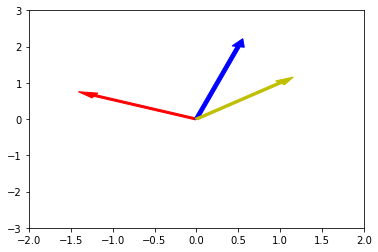

beta (blue): [1.  0.5 2. ], x (red): [-1.21184627  0.65024589], y: 1.642291098096198
betahat (yellow): [-1, 1, 1], yhat: -1.5616003803208676


In [28]:
betahat = [-1,1,1]
print(sim_linfit(betahat))

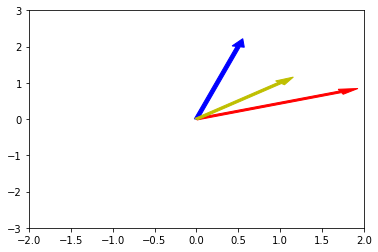

beta (blue): [1.  0.5 2. ], x (red): [1.7246148  0.75343014], y: 3.6828466575704555
betahat (yellow): [-1, 1, 1], yhat: 1.4780449381863248


In [7]:
betahat = [-1,1,1]
print(sim_linfit(betahat))

- **Loss**: $$\ell(\hat y_i,y_i) = \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i \right)^2$$

- **Gradient**: $$\frac{\partial}{\partial \beta_j} \ell(\hat y_i,y_i) = 2 \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right) x_{i,j}  = \eta_i x_{i,j}$$
$$\frac{\partial}{\partial \beta_0} \ell(\hat y_i,y_i) = 2 \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right)  = \eta_i$$
$$ \eta_i = 2 \left(\hat y_i - y_i \right)$$

- **Update**: choose some multiplier $\mu$, $$\beta \gets \beta - \mu \eta_i x_i$$
$$\beta_0 \gets \beta_0 - \mu \eta_i$$

In [8]:
## open wine data
with open('../data/winequality-red.csv','r') as winefile:
    header = winefile.readline()
    wine_list = [line.strip().split(';') for line in winefile]

In [9]:
## array and standardize wine data
wine_ar = np.array(wine_list,dtype=np.float64)
Y = wine_ar[:,-1]
X = wine_ar[:,:-1]
n,p = X.shape

X = n**0.5 * (X - X.mean(axis=0)) / X.std(axis=0)

In [10]:
## import online linear reg
from LROnline import *

learner = LROnline(p,loss='sqr',decay=-1.)

In [11]:
help(learner.update_beta) # why we do docstrings

Help on method update_beta in module LROnline:

update_beta(x, y) method of LROnline.LROnline instance
    single step update, output loss
    args: x,y



In [12]:
yx_it = zip(Y,X) # iterator giving data
y,x = next(yx_it) # first datum

In [13]:
learner.beta, y, x # init beta, first datum

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 5.0,
 array([-21.12777894,  38.46304151, -55.64149498, -18.12307015,
         -9.74522065, -18.64187237, -15.16056766,  22.32399898,
         51.52960611, -23.16101967, -38.39783932]))

In [14]:
learner.update_beta(x,y) # return loss

25.0

In [15]:
learner.beta, y, x # new beta, first datum

(array([-211.27778942,  384.63041512, -556.41494984, -181.23070154,
         -97.45220654, -186.41872368, -151.60567657,  223.2399898 ,
         515.29606114, -231.61019672, -383.97839323]),
 5.0,
 array([-21.12777894,  38.46304151, -55.64149498, -18.12307015,
         -9.74522065, -18.64187237, -15.16056766,  22.32399898,
         51.52960611, -23.16101967, -38.39783932]))

In [16]:
losses = [learner.update_beta(x,y) for y,x in yx_it] # run online learning

/home/jsharpna/Documents/141Blectures/lecture8/LROnline.py:61: RuntimeWarning: overflow encountered in double_scalars
  return (yhat - y)**2.


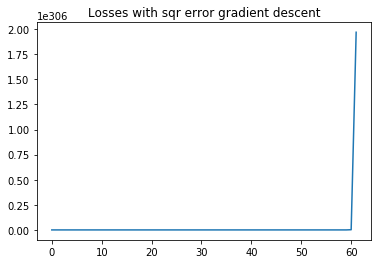

In [19]:
plt.plot(losses)
_ = plt.title('Losses with sqr error gradient descent')

In [18]:
losses[:10]

[2067729527.0887518,
 1.2972286475708698e+17,
 1.4484210746218208e+24,
 1.6862015370055045e+31,
 3.0592547367922106e+38,
 1.2139432592209116e+45,
 4.6972074272865694e+51,
 1.488167054648011e+58,
 2.0253212864752874e+64,
 4.4936114827916035e+69,
 7.984660543274198e+74,
 2.302756038514625e+80,
 2.169052862390691e+86,
 3.741028761437904e+92,
 1.619810075206481e+100,
 7.477687139133545e+106,
 2.732892602772651e+112,
 1.137326138353174e+118,
 5.329103551233114e+123,
 1.0696793225108389e+128]

- **Loss**: $$\ell(\hat y_i,y_i) = \left| \beta_0 + \sum_j \beta_j x_{i,j} - y_i \right|$$

- **(sub-)Gradient**: $$\frac{\partial}{\partial \beta_j} \ell(\hat y_i,y_i) = {\rm sign} \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right) x_{i,j}  = \eta_i x_{i,j}$$
$$\frac{\partial}{\partial \beta_0} \ell(\hat y_i,y_i) = {\rm sign} \left(\beta_0 + \sum_j \beta_j x_{i,j} - y_i\right)  = \eta_i$$
$$ \eta_i = {\rm sign} \left(\hat y_i - y_i \right)$$

- **Update**: choose some multiplier $\mu$, $$\beta \gets \beta - \mu \eta_i x_i$$
$$\beta_0 \gets \beta_0 - \mu \eta_i$$

In [94]:
learner.beta

array([ 2.19262545, -0.43849604, -0.43632342,  0.6404891 , -0.20420907,
        0.08103325,  0.28162537, -1.85430897,  1.24673039,  0.31199578,
       -0.86939119])

In [20]:
learner = LROnline(p,loss='abs',decay=-1.)
losses = [learner.update_beta(x,y) for y,x in zip(Y,X)]

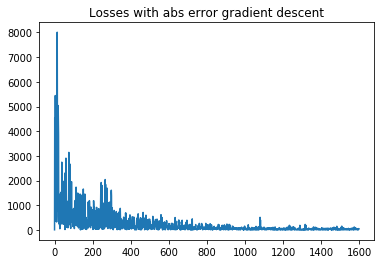

In [21]:
plt.plot(losses)
_ = plt.title('Losses with abs error gradient descent')